In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [178]:
I=np.eye(5)#输出一个5*5的单位矩阵
I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [179]:
#读取数据并显示
path='ex1data1.txt'
data=pd.read_csv(path,header=None,names=['Population','Profit'])#无header表头，手动添加表头，名称为names
data.head()#观察前5行

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


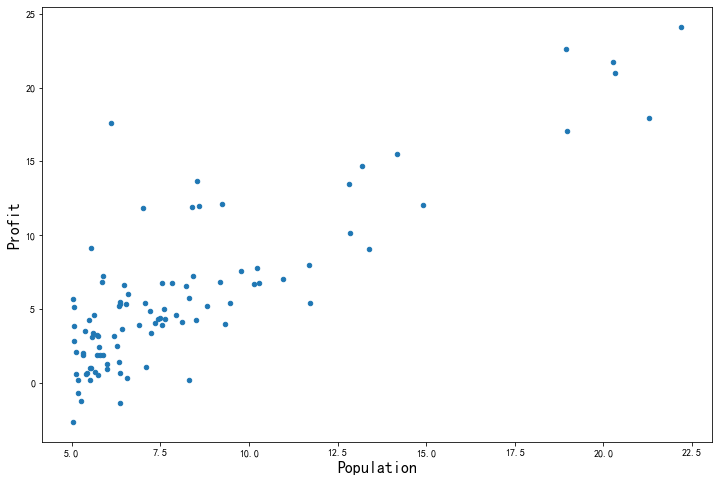

In [180]:
#可视化数据
data.plot(kind='scatter', x='Population', y='Profit',figsize=(12,8))
plt.xlabel('Population',size=16)
plt.ylabel('Profit',size=16)
plt.show()
#由图可知Population和Profit范围接近，可以不需要归一化

In [181]:
data.insert(0,'ones',1)#插入第一列，表头名称，插入数字

In [182]:
#准备数据
X=data.iloc[:,[0,1]]#取所有行，第1和第2列 此处其实不够“智能”
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [183]:
y=data.iloc[:,[-1]]#取所有行，最后一列，[-1]的“[]”不能少，否则维度不对
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [184]:
#矩阵化
X=np.matrix(X.values)
y=np.matrix(y.values)
#初始化theta0 theta1
theta=np.matrix(np.array([0,0]))
X,y,theta

(matrix([[ 1.    ,  6.1101],
         [ 1.    ,  5.5277],
         [ 1.    ,  8.5186],
         [ 1.    ,  7.0032],
         [ 1.    ,  5.8598],
         [ 1.    ,  8.3829],
         [ 1.    ,  7.4764],
         [ 1.    ,  8.5781],
         [ 1.    ,  6.4862],
         [ 1.    ,  5.0546],
         [ 1.    ,  5.7107],
         [ 1.    , 14.164 ],
         [ 1.    ,  5.734 ],
         [ 1.    ,  8.4084],
         [ 1.    ,  5.6407],
         [ 1.    ,  5.3794],
         [ 1.    ,  6.3654],
         [ 1.    ,  5.1301],
         [ 1.    ,  6.4296],
         [ 1.    ,  7.0708],
         [ 1.    ,  6.1891],
         [ 1.    , 20.27  ],
         [ 1.    ,  5.4901],
         [ 1.    ,  6.3261],
         [ 1.    ,  5.5649],
         [ 1.    , 18.945 ],
         [ 1.    , 12.828 ],
         [ 1.    , 10.957 ],
         [ 1.    , 13.176 ],
         [ 1.    , 22.203 ],
         [ 1.    ,  5.2524],
         [ 1.    ,  6.5894],
         [ 1.    ,  9.2482],
         [ 1.    ,  5.8918],
         [ 1. 

In [185]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [186]:
#定义代价函数
def cost_function(X,y,theta):
    J=np.sum(np.power(X*theta.T-y,2))/(2*X.shape[0])
    return J

In [187]:
#测试
cost_function(X,y,theta)

32.072733877455676

In [188]:
#批量梯度下降
#alpha:学习率 iters:迭代次数
def gradient_descent(X,y,theta,alpha,iters):
    #初始化
    #参数数目也就是theta的数目
    parameters=int(theta.ravel().shape[1])#ravel将多维数组转换为一维数组
    #暂存theta更新的变量
    temp=np.matrix(np.zeros(theta.shape))
    #可视化cost
    cost=np.zeros(iters)
    for i in range(iters):
        error=X*theta.T-y
        for j in range(parameters):
            term=np.sum(np.multiply(error,X[:,j]))#multiply作用是对应位置相乘)
            temp[0,j]=theta[0,j]-alpha*term/X.shape[0]
        theta=temp
        cost[i]=cost_function(X,y,theta)
    return theta,cost

In [189]:
#初始化学习率和迭代次数
learning_rate=0.01
iters=1500

In [190]:
#批量梯度下降
fit_theta,cost=gradient_descent(X,y,theta,learning_rate,iters)
fit_theta

matrix([[-3.63029144,  1.16636235]])

In [191]:
#计算拟合参数的代价
cost_function(X,y,fit_theta)

4.483388256587726

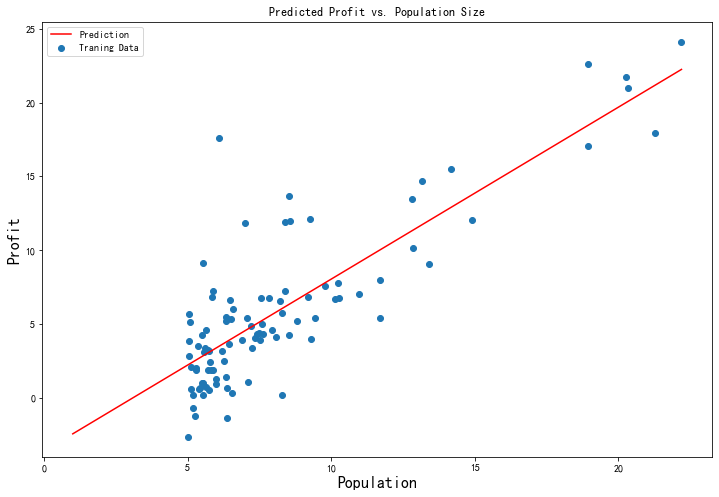

In [193]:
#可视化拟合效果
x_line=np.linspace(X.min(),X.max(),100)
fit_line=fit_theta[0,0]+fit_theta[0,1]*x_line
#设置画布
fig,ax=plt.subplots(figsize=(12,8))
#画出拟合的直线
ax.plot(x_line, fit_line, 'r', label='Prediction')
#画出数据的散点图
ax.scatter(data.Population, data.Profit, label='Traning Data')
#设置图例位置 2=upper left
ax.legend(loc=2)
#设置坐标，标题
ax.set_xlabel('Population',size=16)
ax.set_ylabel('Profit',size=16)
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

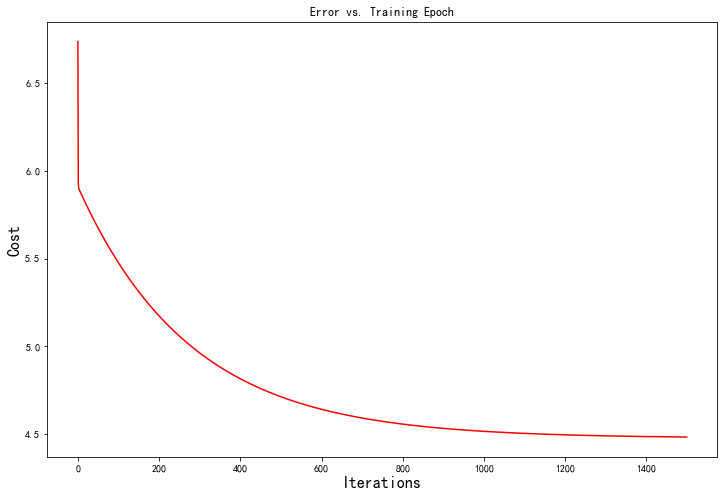

In [195]:
#绘制代价函数随迭代次数变化的曲线
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations',size=16)
ax.set_ylabel('Cost',size=16)
ax.set_title('Error vs. Training Epoch')
plt.show()

-------------------------------------------------------------------------------------------------------------------

In [210]:
#多变量线性回归
path='ex1data2.txt'
data2=pd.read_csv(path,header=None,names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [211]:
#预处理，特征归一化
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [212]:
data2.insert(0,'Ones',1)
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [215]:
X2=data2.iloc[:,[0,1,2]]
y2=data2.iloc[:,[-1]]
#X2,y2矩阵化(一定要有)
X2=np.matrix(X2.values)
y2=np.matrix(y2.values)
theta2=np.matrix(np.array([0,0,0]))
X2.shape,y2.shape,theta2.shape

((47, 3), (47, 1), (1, 3))

In [216]:
fit_theta2,cost2=gradient_descent(X2,y2,theta2,learning_rate,iters)
cost_function(X2,y2,fit_theta2)

0.130686706060959

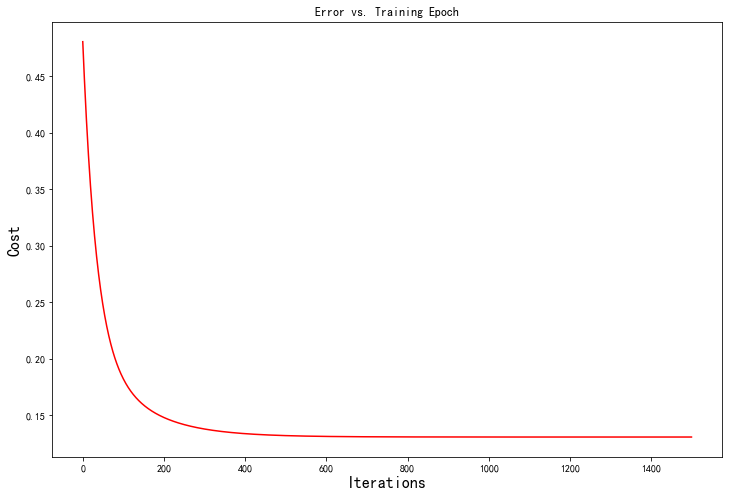

In [217]:
#绘制代价函数随迭代次数变化的曲线
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations',size=16)
ax.set_ylabel('Cost',size=16)
ax.set_title('Error vs. Training Epoch')
plt.show()

-------------------------------------------------------------------------------------------------------------------

In [232]:
def normal_equation(X,y):
    theta=np.linalg.inv((X.T*X))*X.T*y
    return theta

In [239]:
fit_theta3=normal_equation(X,y)
fit_theta3=fit_theta3.ravel()

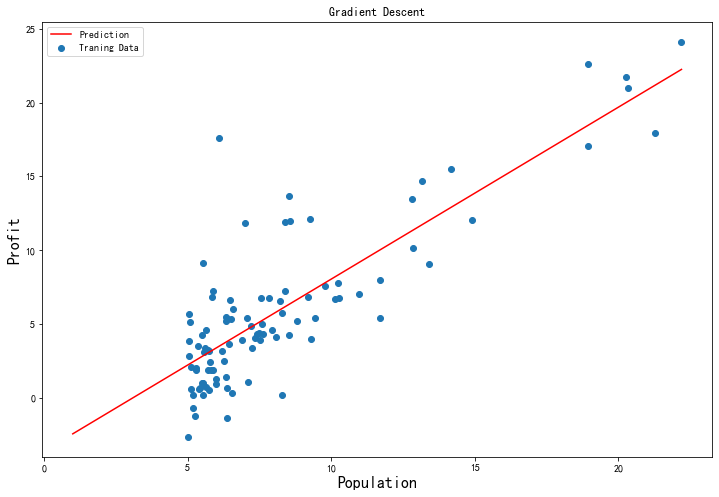

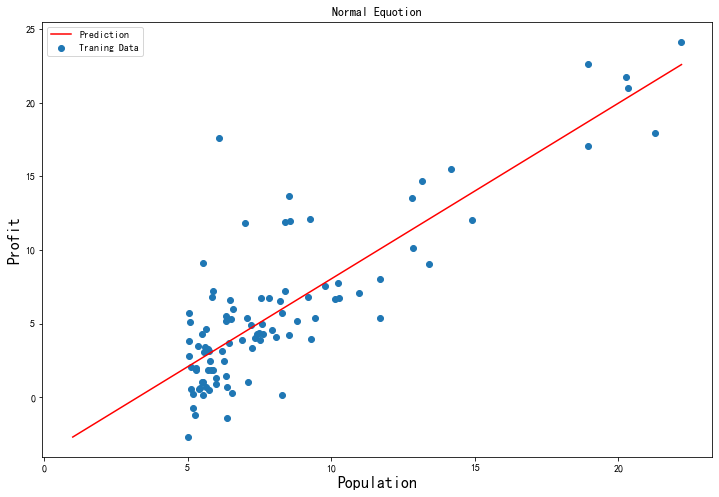

(4.483388256587726, 4.476971375975179)

In [243]:
#批量梯度下降可视化拟合效果
x_line=np.linspace(X.min(),X.max(),100)
fit_line=fit_theta[0,0]+fit_theta[0,1]*x_line
#设置画布
fig,ax=plt.subplots(figsize=(12,8))
#画出拟合的直线
ax.plot(x_line, fit_line, 'r', label='Prediction')
#画出数据的散点图
ax.scatter(data.Population, data.Profit, label='Traning Data')
#设置图例位置 2=upper left
ax.legend(loc=2)
#设置坐标，标题
ax.set_xlabel('Population',size=16)
ax.set_ylabel('Profit',size=16)
ax.set_title('Gradient Descent')
#正规方程可视化拟合效果
x_line=np.linspace(X.min(),X.max(),100)
fit_line=fit_theta3[0,0]+fit_theta3[0,1]*x_line
#设置画布
fig,ax=plt.subplots(figsize=(12,8))
#画出拟合的直线
ax.plot(x_line, fit_line, 'r', label='Prediction')
#画出数据的散点图
ax.scatter(data.Population, data.Profit, label='Traning Data')
#设置图例位置 2=upper left
ax.legend(loc=2)
#设置坐标，标题
ax.set_xlabel('Population',size=16)
ax.set_ylabel('Profit',size=16)
ax.set_title('Normal Equotion')
plt.show()

In [244]:
fit_theta,fit_theta3

(matrix([[-3.63029144,  1.16636235]]), matrix([[-3.89578088,  1.19303364]]))

In [245]:
cost_function(X,y,fit_theta),cost_function(X,y,fit_theta3)

(4.483388256587726, 4.476971375975179)